# Exploring data with Pandas

<img src="https://miro.medium.com/max/819/1*Dss7A8Z-M4x8LD9ccgw7pQ.png" width="500px">

Today, we will:

1. Make sure that everyone remembers how to do the basics with `pandas`.
2. Do some data analysis with existing data sets.
3. Make some visualizations of the data.

## Notebook instructions

We will work through the notebook making sure to write all necessary code and answer any questions. We will start together and then you will work on the exercises as a group.

### Outline:

1. [Stellar Classification Dataset - SDSS17](#dataset)
2. [Loading and exploring a dataset](#loading)
3. [Visualizing your data](#visualizing)

### Useful imports (make sure to execute this cell!)
Let's get a few of our imports out of the way. If you find others you need to add, consider coming back and putting them here.

In [1]:
# necessary imports for this notebook
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks') # setting style
sns.set_context('talk') # setting context
sns.set_palette('colorblind') # setting palette

----
<a id="dataset"></a>
## 1. Stellar Classification Dataset - SDSS17

The [Stellar Classification Dataset](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17) is a collection of observations of stars from the Sloan Digital Sky Survey (SDSS). The dataset contains various features of stars, such as their brightness, color, and spectral type, which can be used to classify them into different categories. The data set has 100,000 observations of starts, with 17 features and 1 class column. The features include:

- obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
- alpha = Right Ascension angle (at J2000 epoch)
- delta = Declination angle (at J2000 epoch)
- u = Ultraviolet filter in the photometric system
- g = Green filter in the photometric system
- r = Red filter in the photometric system
- i = Near Infrared filter in the photometric system
- z = Infrared filter in the photometric system
- run_ID = Run Number used to identify the specific scan
- rereun_ID = Rerun Number to specify how the image was processed
- cam_col = Camera column to identify the scanline within the run
- field_ID = Field number to identify each field
- spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
- redshift = redshift value based on the increase in wavelength
- plate = plate ID, identifies each plate in SDSS
- MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
- fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

And the class column is:
- class = object class (galaxy, star or quasar object)

For this exercise, we will use the Stellar Classification Dataset to explore how to load and visualize data using `pandas` and `matplotlib`. Later we will use this dataset for some classification and regression tasks.

---
<a id="loading"></a>
## 2. Loading and exploring a dataset

The goal is typically to read some sort of preexisting data **into** a DataFrame so we can work with it. 

Pandas is pretty flexible about reading in data and can read in a [variety of formats](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html). However, it sometimes needs a little help. We are going to read in a CSV file, which is a common format for data. 

The Stellar Classification dataset is one that has a particularly nice set of features and is of a manageable size such that it can be used as a good dataset for learning new data analysis techiques or testing out code. This allows one to focus on the code and data science methods without getting too caught up in wrangling the data. However, **data wrangling** is an authentic part of doing any sort of meaningful data analysis as data more often messier than not. 

Although you will be working with this dataset today, you may still have to do a bit of wrangling along the way.

### 2.1 Reading in the data

Download the data set from [Kaggle](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17) and save it in the same directory as this notebook, or you can use the following code to load it if you cloned the repository.

**NOTE:** We need to check this data for missing values or other issues before we can use it.

* Using `read_csv` to load the data
* Using `head` to look at the first few rows

In [2]:
### your code here

stellar = pd.read_csv('./data/star_classification.csv')
stellar.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


### 2.2 Checking the data

One of the first things we want to do is check the data for missing values or other issues. We can do this using the `info` and `describe` methods. 

* Using `info` to check the data types and missing values
* Using `describe` to get a summary of the data

**What do you notice about the data? Are there any strange values or missing values?**

In [3]:
### your code here

stellar.info()
stellar.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


### 2.3 Dealing with problematic data

Sometimes we will find that there are missing values or other issues with the data. We can deal with these issues in a few different ways:
* Dropping the rows with missing values
* Filling in the missing values with a specific value (e.g., 0 or the mean of the column) - *imputation*
* Finding and replacing problematic values (e.g., negative values in a column that should only have positive values)

What you do to deal with these issues will depend on the specific dataset and the analysis you are doing. In this case, we know there's only one row with problematic data, so we can drop it.

We have to find the row with the problematic data and then drop it.

#### Slicing the DataFrame

To investigate the data, we can use slicing to look at specific rows and columns. Let's note we can get a specific row by using the `iloc` method, which allows us to index by position.
```python
df.iloc[0]  # Get the first row
df.iloc[0:5]  # Get the first five rows
df.iloc[:, 0]  # Get the first column
df.iloc[:, 0:5]  # Get the first five columns
```

We can also use boolean indexing to filter the DataFrame based on specific conditions. For example, we can find all rows where the `class` column is equal to 'star':
```python
df[df['class'] == 'star']  # Get all rows where class is 'star'
```
or to find all rows where the `redshift` column is greater than 0.5:
```python
df[df['redshift'] > 0.5]  # Get all rows where redshift is greater than 0.5
```

* Find the row with the problematic data by using boolean indexing (consider the columns reporting values of -9999)

In [4]:
### your code here

### find the stellar objects with u < -9998
stellar[stellar['u'] < -9998]

### drop the rows with u < -9998
stellar = stellar[stellar['u'] >= -9998]
stellar.info()
stellar.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 99999 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       99999 non-null  float64
 1   alpha        99999 non-null  float64
 2   delta        99999 non-null  float64
 3   u            99999 non-null  float64
 4   g            99999 non-null  float64
 5   r            99999 non-null  float64
 6   i            99999 non-null  float64
 7   z            99999 non-null  float64
 8   run_ID       99999 non-null  int64  
 9   rerun_ID     99999 non-null  int64  
 10  cam_col      99999 non-null  int64  
 11  field_ID     99999 non-null  int64  
 12  spec_obj_ID  99999 non-null  float64
 13  class        99999 non-null  object 
 14  redshift     99999 non-null  float64
 15  plate        99999 non-null  int64  
 16  MJD          99999 non-null  int64  
 17  fiber_ID     99999 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.0,99999.000000,99999.000000,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000
mean,1.237665e+18,177.628653,24.135552,22.080679,20.631583,19.645777,19.084865,18.768988,4481.403354,301.0,3.511625,186.127011,5.783903e+18,0.576667,5137.027890,55588.653687,449.315613
std,8.438450e+12,96.502612,19.644608,2.251068,2.037384,1.854763,1.757900,1.765982,1964.739021,0.0,1.586913,149.007687,3.324026e+18,0.730709,2952.312485,1808.492217,272.498252
min,1.237646e+18,0.005528,-18.785328,10.996230,10.498200,9.822070,9.469903,9.612333,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.517698,5.147477,20.352410,18.965240,18.135795,17.732280,17.460830,3187.000000,301.0,2.000000,82.000000,2.844137e+18,0.054522,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900527,23.646462,22.179140,21.099930,20.125310,19.405150,19.004600,4188.000000,301.0,4.000000,146.000000,5.614896e+18,0.424176,4987.000000,55869.000000,433.000000
75%,1.237668e+18,233.895005,39.901582,23.687480,22.123775,21.044790,20.396510,19.921120,5326.000000,301.0,5.000000,241.000000,8.332365e+18,0.704172,7400.500000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


Make a plot of  u vs g, what do you notice?
make sure to label your axes and title your plot.

there's a bad data point, how can you find it?
remove it and plot again.

<Axes: xlabel='u', ylabel='g'>

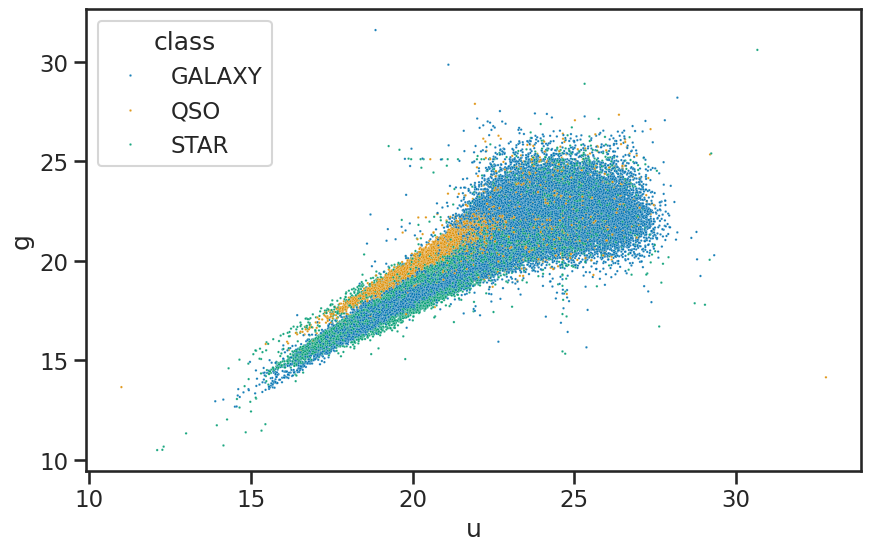

In [5]:
#plotting the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='u', y='g', data=stellar, hue='class', alpha=0.9, s=3)

-----
<a id="visualizing"></a>
## 3. Visualizing your data